In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/l/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sns.set(font='Avenir', style='white')

## Separate data into training set and submission set

In [3]:
df = pd.read_csv('../data/data.csv', index_col='shot_id')

In [4]:
print df.shot_made_flag.isnull().sum()    # no. of rows to predict
print df.shot_made_flag.notnull().sum()   # no. of rows for training

5000
25697


In [5]:
# split data into train-test and final prediction
df[df.shot_made_flag.isnull()].to_csv('../data/submission.csv')
df[df.shot_made_flag.notnull()].to_csv('../data/train.csv')

## Exploratory data analysis

In [6]:
df = pd.read_csv('../data/train.csv', parse_dates=['game_date'], index_col='shot_id')

In [7]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
6,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 2 to 30697
Data columns (total 24 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

#### Observation:
* no missing values

### Categorical variables

In [9]:
for cname in df.columns:
    if df[cname].dtype == 'O':  # object type
        uniques = df[cname].unique()
        print cname, '(' + str(len(uniques)) + ')'
        print uniques
        print '\n'

action_type (55)
['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Jump Hook Shot' 'Running Finger Roll Shot'
 'Jump Bank Shot' 'Turnaround Finger Roll Shot' 'Hook Bank Shot'
 'Driving Hook Shot' 'Running Tip Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Turnaround Bank shot' 'Reverse Slam Dunk Shot'
 'Floating Jump shot' 'Putback Slam Dunk Shot' 'Running Bank shot'
 'Driving Bank shot' 'Driving Jump shot' 'Putback Layup Sh

action_type


/Users/l/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Avenir'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


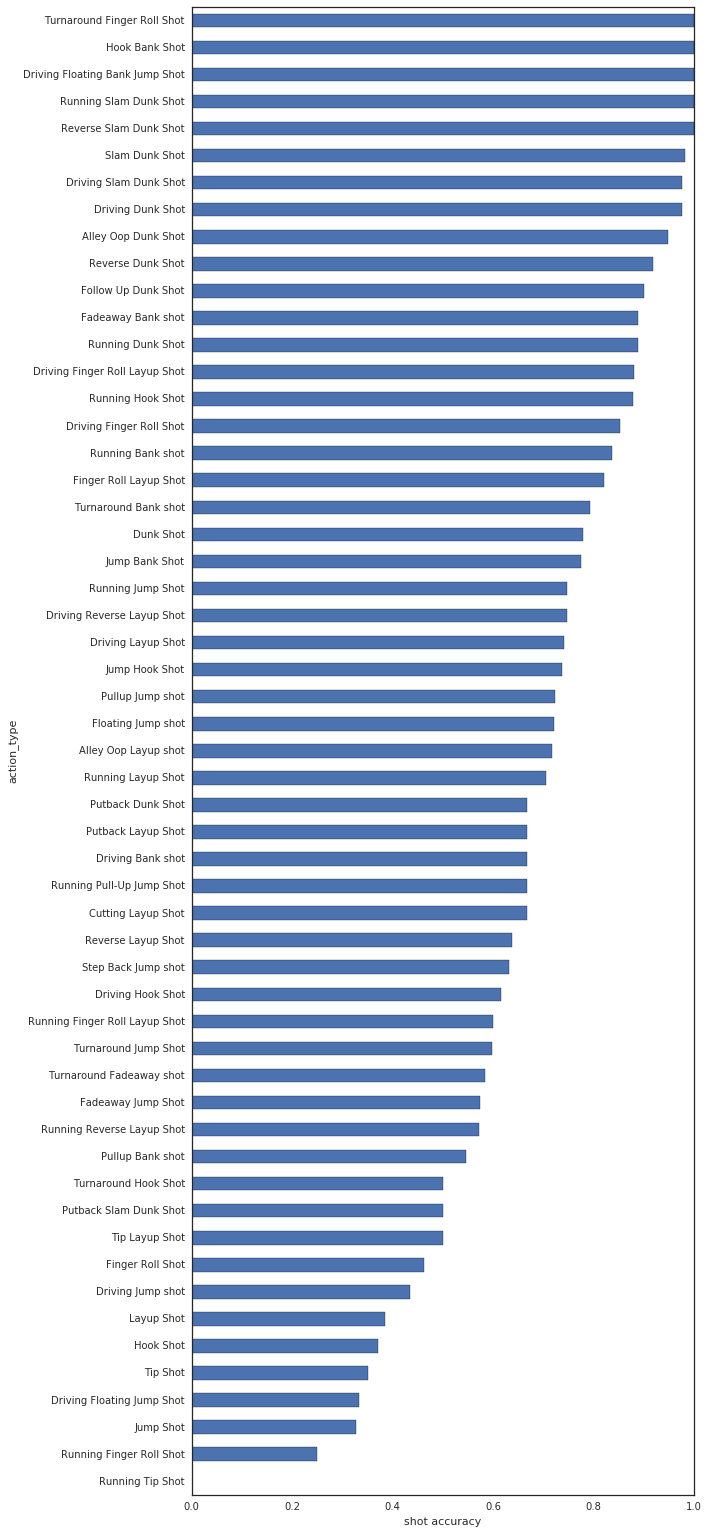

combined_shot_type


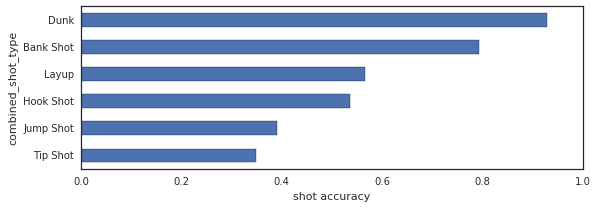

season


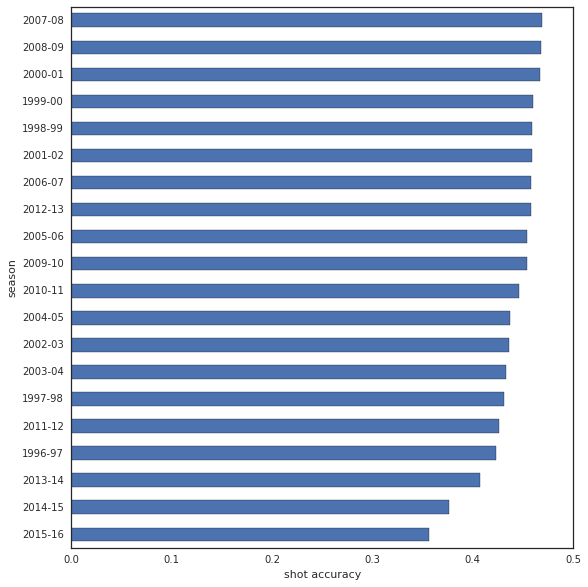

shot_type


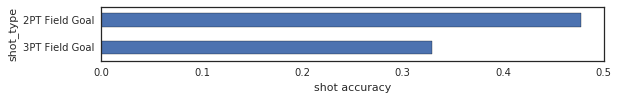

shot_zone_area


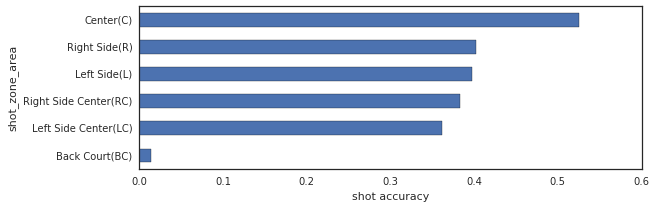

shot_zone_basic


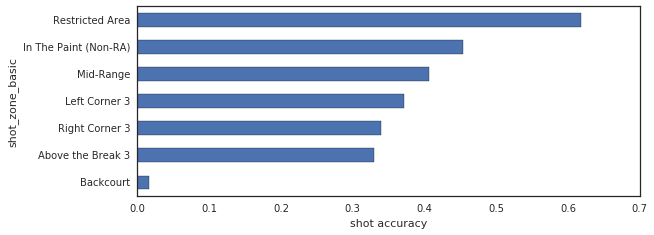

shot_zone_range


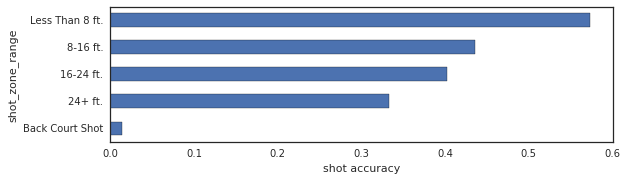

team_name


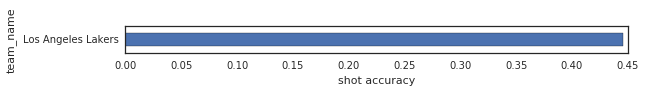

matchup


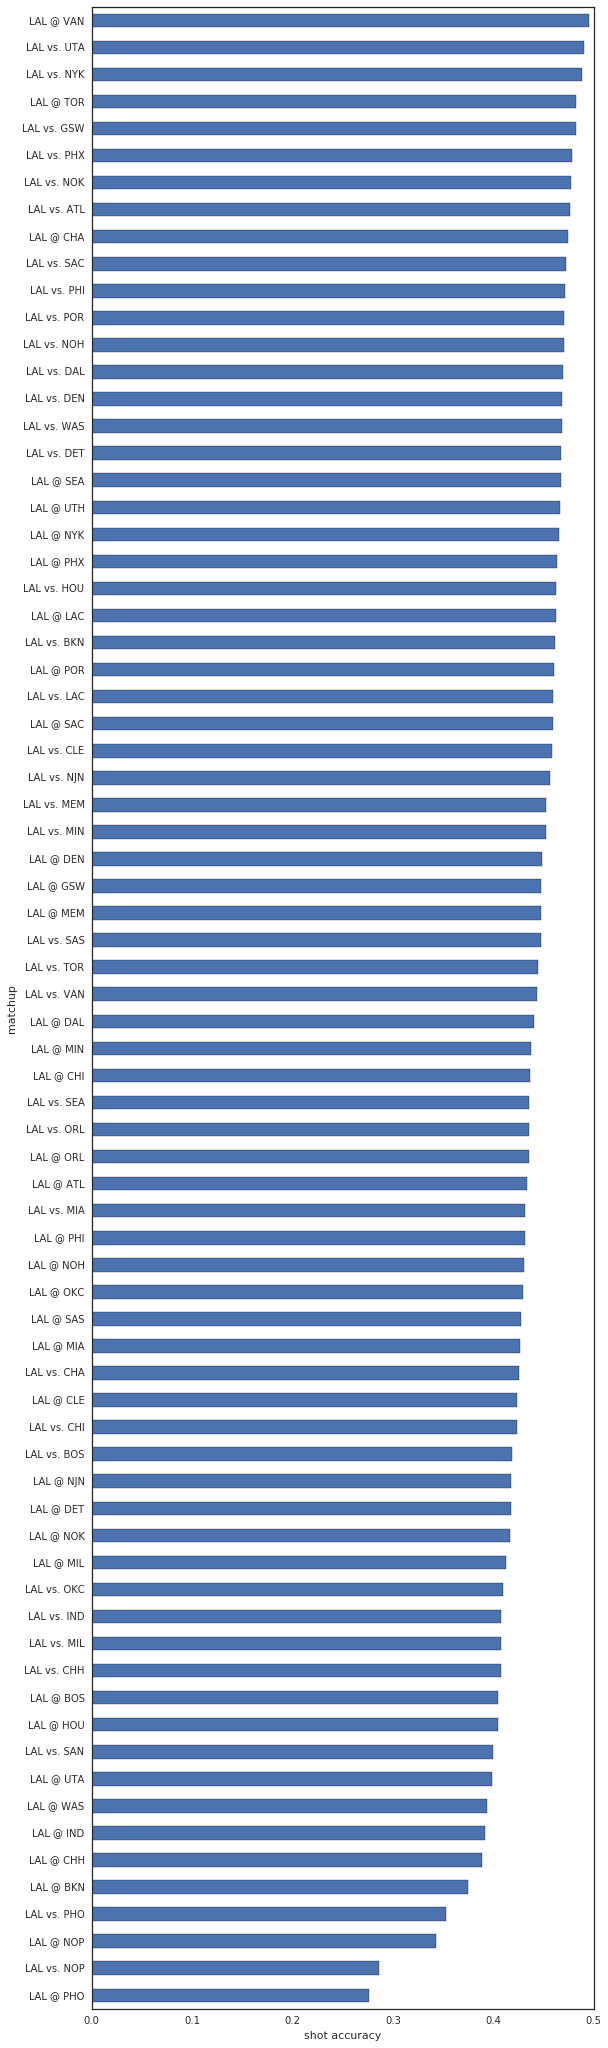

opponent


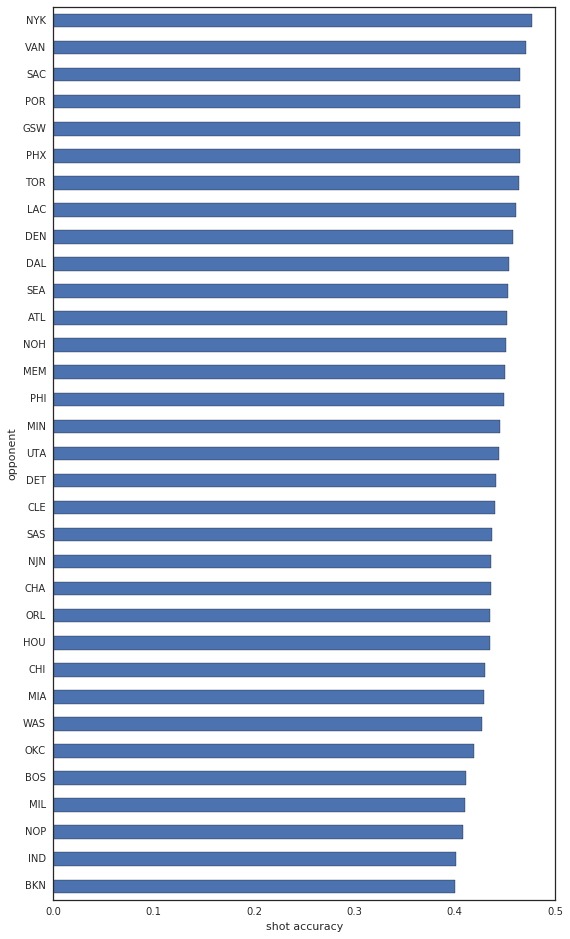

In [10]:
for cname in df.columns:
    if df[cname].dtype == 'O':  # object type
        print cname
        ser = df.groupby(cname)['shot_made_flag'].agg(np.mean).sort_values()
        ser.plot.barh(figsize=(9,16 * len(ser)/33.))
        plt.xlabel('shot accuracy')
        plt.show()

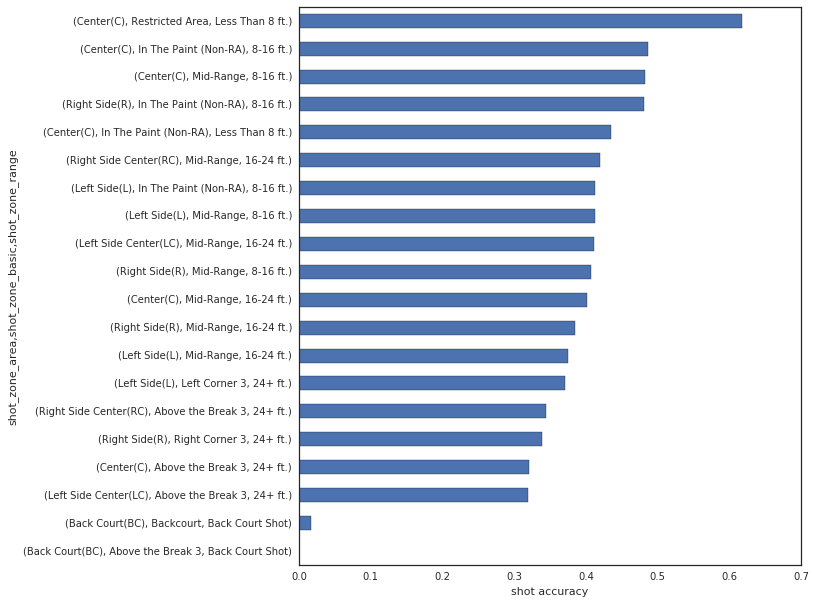

In [11]:
df.groupby(['shot_zone_area', 'shot_zone_basic', 'shot_zone_range'])['shot_made_flag']\
  .agg(np.mean).sort_values().plot.barh(figsize=(9,10))

plt.xlabel('shot accuracy')
plt.show()

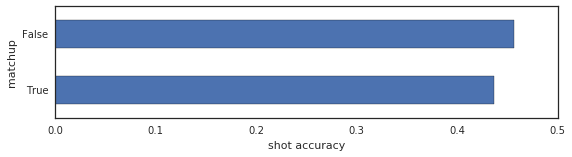

In [12]:
homefield = df['matchup'].str.contains('@')
df.groupby(homefield)['shot_made_flag']\
  .agg(np.mean).sort_values().plot.barh(figsize=(9,2))

plt.xlabel('shot accuracy')
plt.show()

In [13]:
typos = set(df['matchup'].str[-3:]) - set(df['opponent'].unique())

corrected_matchup = df['matchup']

for typo in typos:
    print typo + ' -> ' + df[df.matchup.str.contains(typo)]['opponent'].unique()[0]
    correction = df[df.matchup.str.contains(typo)]['opponent'].unique()[0]
    corrected_matchup = corrected_matchup.str.replace(typo, correction)

print 'distinct matchup before correction:', len(df['matchup'].unique())
print 'distinct matchup after correction:', len(corrected_matchup.unique())

CHH -> CHA
UTH -> UTA
PHO -> PHX
SAN -> SAS
NOK -> NOP
distinct matchup before correction: 74
distinct matchup after correction: 66


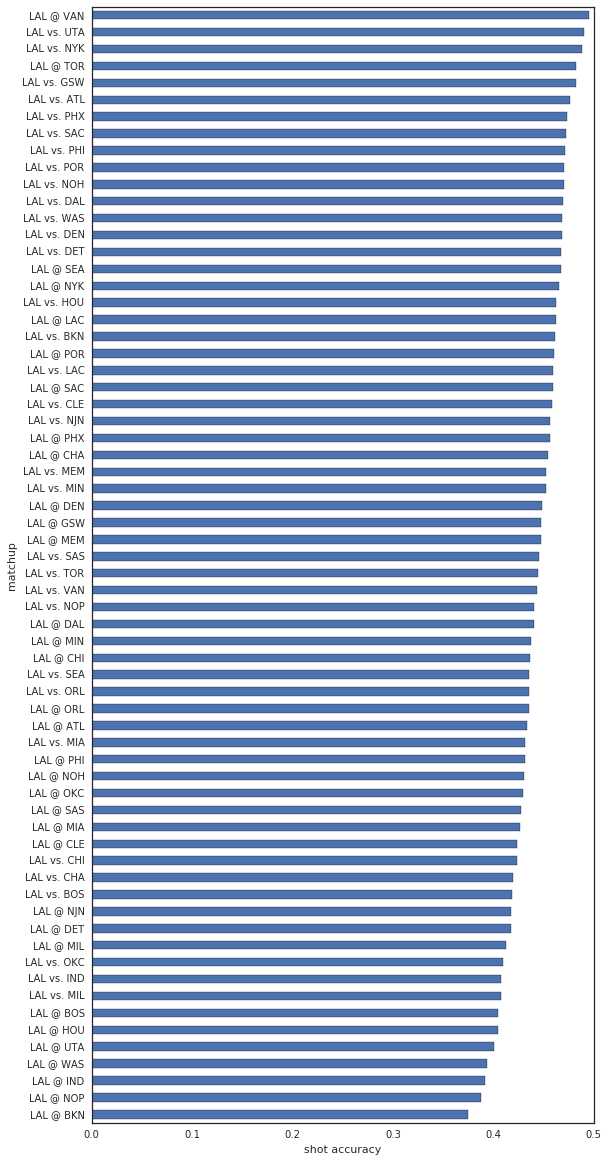

In [14]:
df.groupby(corrected_matchup)['shot_made_flag']\
  .agg(np.mean).sort_values().plot.barh(figsize=(9,20))

plt.xlabel('shot accuracy')
plt.show()

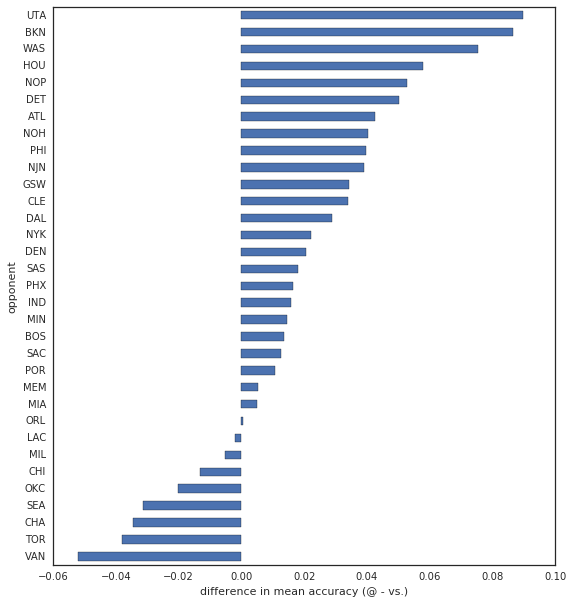

In [15]:
grps = df.groupby([df.opponent, corrected_matchup])['shot_made_flag'].agg(np.mean)

diffs = pd.Series(np.nan, index=grps.index.levels[0])
for opponent in grps.index.levels[0]:
    diffs[opponent] = grps[opponent].diff()[1]

diffs.sort_values().plot.barh(figsize=(9,10))
plt.xlabel('difference in mean accuracy (@ - vs.)')
plt.show()

#### Observations:
* `combined_shot_type` == aggregate of `action_type`
    * `action_type` maybe too specific? drop it for now
* `season`: convert to boolean `last_3_years`
* `shot_type`: convert to boolean `3ptr`
* `shot_zone_area`, `shot_zone_basic`, `shot_zone_range`: lots of redundancy in info
    * convert to boolean columns `backcourt`, `C+RA`
* drop `team_name` (no variation)
* `matchup`, `opponent`: 
    * typo in matchup
    * convert to boolean column `better_when_homefield` (`True` for opponents ORL, LAC, MIL, CHI, OKC, SEA, CHA, TOR and VAN)

### Numeric variables

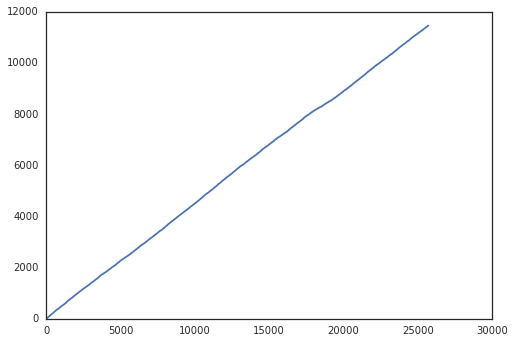

In [16]:
# rate of shots made
y = np.cumsum(df['shot_made_flag'])
plt.plot(xrange(len(y)), y)
plt.show()

lat


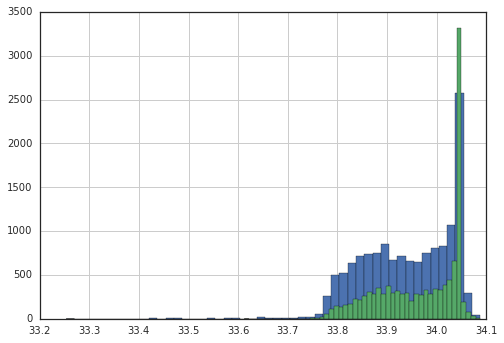

loc_x


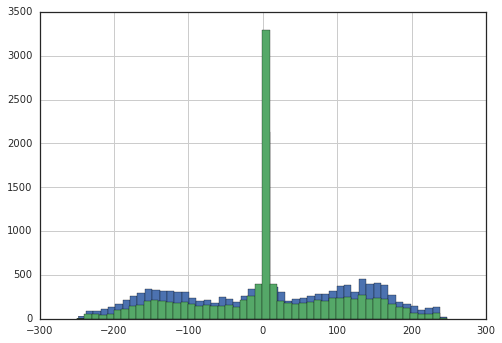

loc_y


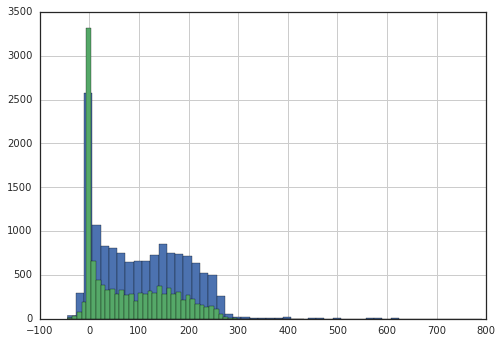

lon


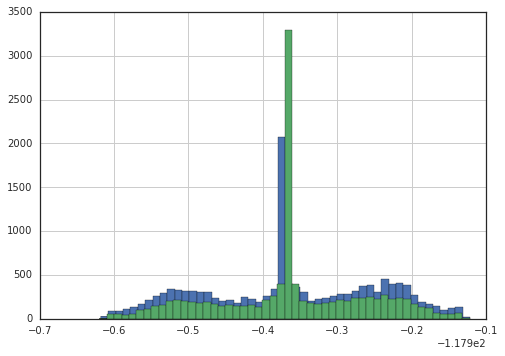

minutes_remaining


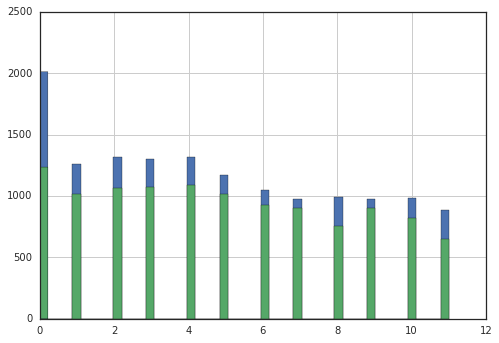

period


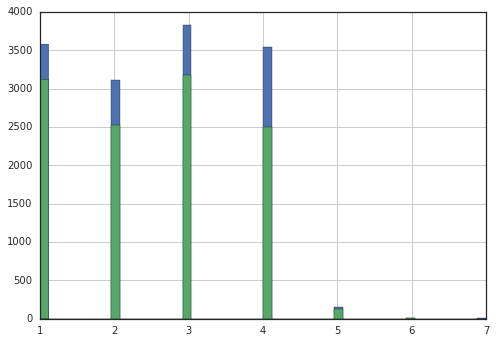

playoffs


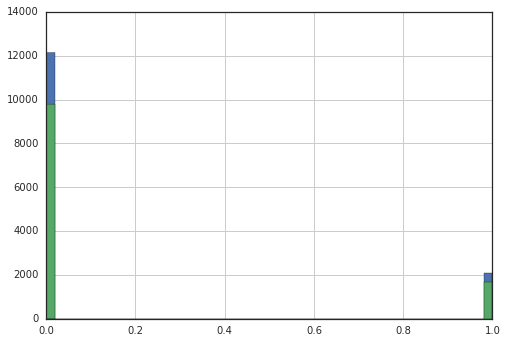

seconds_remaining


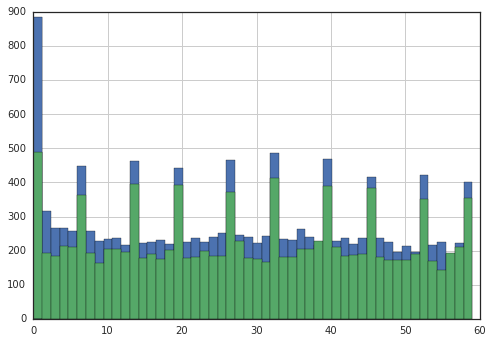

shot_distance


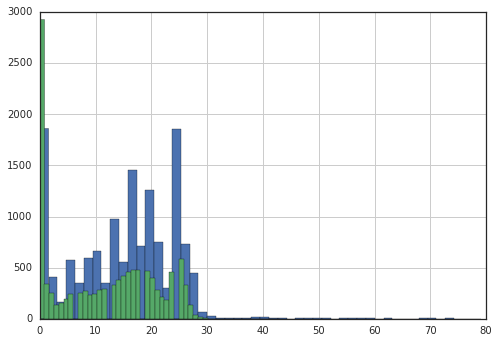

In [17]:
for cname in df.columns:
    if cname not in ('game_event_id', 'game_id', 'game_date', 'team_id', 'shot_made_flag') \
       and df[cname].dtype != 'O':  # not object type
        print cname
        df.groupby('shot_made_flag')[cname].hist(bins=50)
        plt.show()

In [18]:
df[['seconds_remaining', 'minutes_remaining']].describe()

,seconds_remaining,minutes_remaining
count,25697.000000,25697.000000
mean,28.311554,4.886796
std,17.523392,3.452475
min,0.000000,0.000000
25%,13.000000,2.000000
50%,28.000000,5.000000
75%,43.000000,8.000000
max,59.000000,11.000000


/Users/l/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


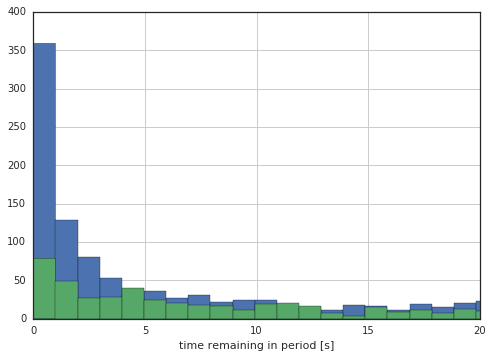

In [19]:
time_remaining = df[['seconds_remaining', 'shot_made_flag']]
time_remaining.loc[:,'seconds_remaining'] += df['minutes_remaining'] * 60

time_remaining.groupby('shot_made_flag')['seconds_remaining']\
              .hist(bins=60*12, normed=True)  # bins of 1s
plt.xlim(0,20)
plt.xlabel('time remaining in period [s]')
plt.show()

#### Observations:
* rate of shots made is a fairly straight line
    * slope = constant probability a shot goes in – use this as the baseline model
* `game_event_id`, `game_id`, `team_id` – no use
* `loc_y`, `loc_x` == `lat`, `lon` centered at the basket
    * information comprised in `action_type`, `combined_action_type`, `shot_type`, `shot_zone_basic`, `shot_zone_area`, `shot_zone_range` – so drop all four columns
* `shot_distance` overlaps in information with the above categorical columns
    * since type of action is more characteristic than the percise distance from the basket, drop `shot_distance`
* `seconds_remaining` ranges from [0,59] and `minutes_remaining` from [0,11]
    * so the sum of the two is the `time_remaining` respective period
    * accuracy is final 4 seconds is noticably lower
    * convert into boolean column `final_4s` and `final_s`
* `period`: convert into two boolean columns `4th_period`, `extra_time`
* `playoff`: keep as is

## Combine into Cleaner

Pandas starts throwing `SettingWithCopy` warnings since last update:

```
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead.

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
```

Note on `SettingWithCopy` warning:

* [returning a view vs. a copy](http://pandas.pydata.org/pandas-docs/stable/indexing.html#returning-a-view-versus-a-copy):
    * `df['col']` can either return a view or a copy, depending on the memory layout of df (no guarantees)
    * `df.loc[:,'col']` is guaranteed a view and faster
    

* why does assignment fail when using chained indexing:(http://pandas.pydata.org/pandas-docs/stable/indexing.html#why-does-assignment-fail-when-using-chained-indexing)
>Sometimes a SettingWithCopy warning will arise at times when there’s no obvious chained indexing going on. These are the bugs that SettingWithCopy is designed to catch!


* [evaluation order matters](http://pandas.pydata.org/pandas-docs/stable/indexing.html#evaluation-order-matters):
>The chained assignment warnings / exceptions are aiming to inform the user of a possibly invalid assignment. There may be false positives; situations where a chained assignment is inadvertently reported.

In [20]:
# %%writefile cleaner.py

import pandas as pd

def cleaner(df):
    
    # convert all boolean columns to int for logistic regression
    
    ## categorical variables
    
    df.loc[:,'3ptr'] = df['shot_type'].str.startswith('3').astype(int)
    
    df.loc[:,'last_3_years'] = (df['season'] > '2013').astype(int)
    
    df.loc[:,'backcourt'] = ((df.shot_zone_area == 'Back Court(BC)') | \
                             (df.shot_zone_basic == 'backcourt')).astype(int)
    df.loc[:,'C+RA'] = ((df.shot_zone_area == 'Center(C)') | \
                        (df.shot_zone_basic == 'Restricted Area')).astype(int)
    
    teams_of_interest = set(['ORL', 'LAC', 'MIL', 'CHI', 'OKC', 'SEA', 'CHA', 'TOR', 'VAN'])
    df.loc[:,'better_when_homefield'] = df.opponent.isin(teams_of_interest).astype(int)
    
    df.drop(['action_type', 'shot_type', 'season', 
             'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
             'team_name', 'matchup', 'opponent'], 
            inplace=True, axis=1)
    
    cnames_to_dummify = ['combined_shot_type']
    df = pd.concat([df.drop(cnames_to_dummify, axis=1), 
                    pd.get_dummies(df[cnames_to_dummify], drop_first=True)], 
                   axis=1)
    
    
    ## numerical variables    
    df.loc[:,'final_4s'] = ((df.seconds_remaining < 5) & \
                            (df.seconds_remaining > 1) & \
                            (df.minutes_remaining == 0)).astype(int)
    
    df.loc[:,'final_s'] = ((df.seconds_remaining == 1) & \
                           (df.minutes_remaining == 0)).astype(int)
    
    df.loc[:,'4th_period'] = (df.period == 4).astype(int)
    df.loc[:,'extra_time'] = (df.period > 4).astype(int)
    
    df.drop(['game_event_id', 'game_id', 'team_id',
             'loc_y', 'loc_x', 'lat', 'lon', 'shot_distance',
             'seconds_remaining', 'minutes_remaining', 'period'], inplace=True, axis=1)
    
    # convert date to DateTime if not already done so
    if df['game_date'].dtype == 'O':
        df.loc[:,'game_date'] = pd.to_datetime(df['game_date'])
        
    # sort data in chronological order
    df.loc[:,'shot_id'] = df.index
    df = df.sort_values(['game_date', 'shot_id'])
    df.drop('shot_id', inplace=True, axis=1)
    
    
    return df

### Verify

In [21]:
df_clean = cleaner(df.copy())

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 22902 to 22900
Data columns (total 17 columns):
playoffs                        25697 non-null int64
shot_made_flag                  25697 non-null float64
game_date                       25697 non-null datetime64[ns]
3ptr                            25697 non-null int64
last_3_years                    25697 non-null int64
backcourt                       25697 non-null int64
C+RA                            25697 non-null int64
better_when_homefield           25697 non-null int64
combined_shot_type_Dunk         25697 non-null float64
combined_shot_type_Hook Shot    25697 non-null float64
combined_shot_type_Jump Shot    25697 non-null float64
combined_shot_type_Layup        25697 non-null float64
combined_shot_type_Tip Shot     25697 non-null float64
final_4s                        25697 non-null int64
final_s                         25697 non-null int64
4th_period                      25697 non-null int64
extra_time        

In [23]:
print df_clean.head()['game_date']
print df_clean.tail()['game_date']

shot_id
22902   1996-11-03
22903   1996-11-05
22904   1996-11-06
22905   1996-11-06
22906   1996-11-06
Name: game_date, dtype: datetime64[ns]
shot_id
22895   2016-04-13
22896   2016-04-13
22897   2016-04-13
22898   2016-04-13
22900   2016-04-13
Name: game_date, dtype: datetime64[ns]


In [24]:
# uncomment %%writefile to write cleaner into a python file

## Quick forest model to check feature importance

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from itertools import izip

In [26]:
X = df_clean.drop(['game_date', 'shot_made_flag'], axis=1)
y = df_clean['shot_made_flag']

In [27]:
print X.shape
print y.shape

(25697, 15)
(25697,)


In [28]:
model = RandomForestClassifier(n_estimators=50, n_jobs=-1)
model.fit(X,y)
# not predicting anything

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
sorted(izip(X.columns, model.feature_importances_), key=lambda t: t[1], reverse=True)

[('combined_shot_type_Dunk', 0.30141725603986946),
 ('combined_shot_type_Jump Shot', 0.2336925343794016),
 ('3ptr', 0.1039350706191207),
 ('C+RA', 0.085440225151682481),
 ('combined_shot_type_Layup', 0.082293991483741072),
 ('4th_period', 0.029213427587434691),
 ('better_when_homefield', 0.02652303802231952),
 ('playoffs', 0.024617676012457946),
 ('combined_shot_type_Tip Shot', 0.021342078928487641),
 ('last_3_years', 0.020849407157919168),
 ('backcourt', 0.01752979881109),
 ('final_4s', 0.015372798887703754),
 ('final_s', 0.013949644080405953),
 ('combined_shot_type_Hook Shot', 0.01246336628997579),
 ('extra_time', 0.01135968654839024)]

In [30]:
model = GradientBoostingClassifier(n_estimators=50)
model.fit(X,y)
# not predicting anything

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

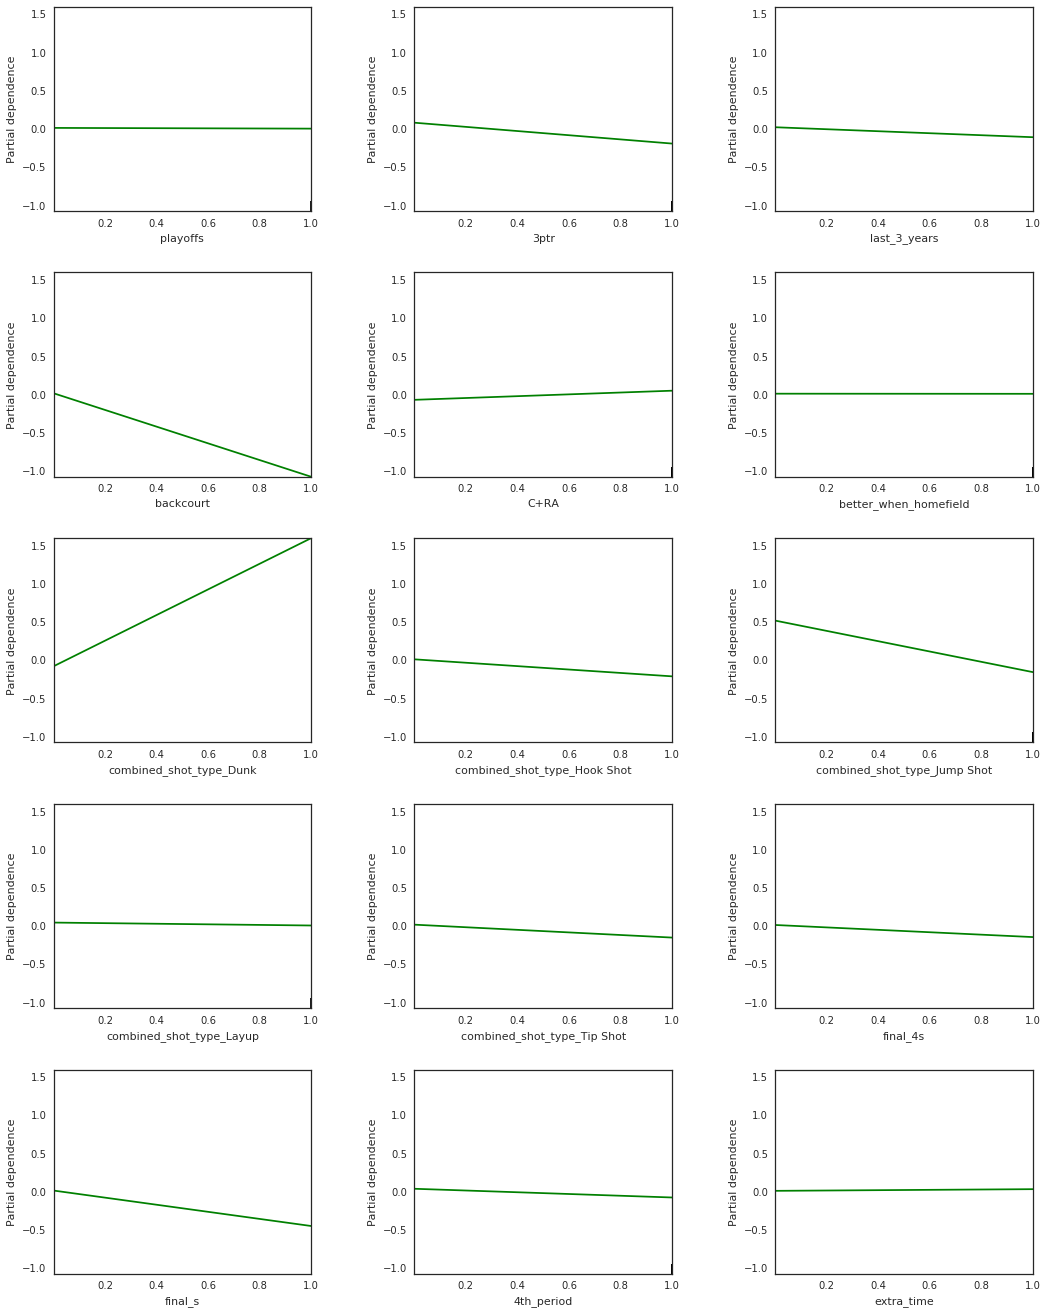

In [31]:
plot_partial_dependence(model, X, range(X.shape[1]), X.columns, figsize=(16,32))
plt.show()